<a href="https://colab.research.google.com/github/sahar7888/NLP/blob/main/VectorDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#%% packages
#%% packages
!pip install chromadb
import re
import pandas as pd
import seaborn as sns
from langchain.text_splitter import SentenceTransformersTokenTextSplitter
import chromadb
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction
from pprint import pprint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.8/526.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.9/91.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.1/106.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 6.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB

In [4]:
# %% max_length
def max_word_count(txt_list:list):
    max_length = 0
    for txt in txt_list:
        word_count = len(re.findall(r'\w+', txt))
        if word_count > max_length:
            max_length = word_count
    return f"Max Word Count: {max_length} words"

In [5]:
!pip install sentence-transformers

In [6]:
import sentence_transformers
from sentence_transformers import SentenceTransformers, SentenceTransformersTokenTextSplitter

ImportError: cannot import name 'SentenceTransformers' from 'sentence_transformers' (/usr/local/lib/python3.10/dist-packages/sentence_transformers/__init__.py)

In [7]:
!pip show sentence_transformers

Name: sentence-transformers
Version: 2.7.0
Summary: Multilingual text embeddings
Home-page: https://www.SBERT.net
Author: Nils Reimers
Author-email: info@nils-reimers.de
License: Apache License 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: huggingface-hub, numpy, Pillow, scikit-learn, scipy, torch, tqdm, transformers
Required-by: 


In [8]:
!jupyter notebook restart

[C 20:16:43.528 NotebookApp] No such file or directory: /content/restart


In [9]:


# %% Sentence splitter
# chroma default sentence model "all-MiniLM-L6-v2"
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
# max input length: 256 characters
model_max_chunk_length = 256
token_splitter = SentenceTransformersTokenTextSplitter(
    tokens_per_chunk=model_max_chunk_length,
    model_name="all-MiniLM-L6-v2",
    chunk_overlap=0
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [10]:
# %% Data Import
text_path = "movies.csv"
df_movies_raw = pd.read_csv(text_path, parse_dates=['release_date'])

df_movies_raw.head(2)

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...


In [11]:
#%% filter movies for missing title or overwiew
selected_cols = ['id', 'title', 'overview', 'vote_average', 'release_date']
df_movies_filt = df_movies_raw[selected_cols].dropna()
# filter for unique ids
df_movies_filt = df_movies_filt.drop_duplicates(subset=['id'])

In [12]:
# filter for movies after 01.01.2023
df_movies_filt = df_movies_filt[df_movies_filt['release_date'] > '2023-01-01']
df_movies_filt.shape
#%%

(1112, 5)

In [13]:
# %%
max_word_count(df_movies_filt['overview'])

#%% Word Distribution
descriptions_len = []
for txt in df_movies_filt.loc[:, "overview"]:
    descriptions_len.append(len(re.findall(r'\w+', txt)))

<Axes: ylabel='Count'>

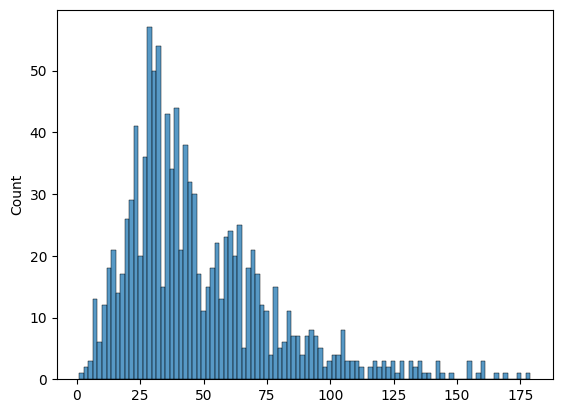

In [14]:
#%% visualize token distribution
sns.histplot(descriptions_len, bins=100)

In [15]:
# %%
embedding_fn = SentenceTransformerEmbeddingFunction()

In [16]:
# %%
# chroma_db = chromadb.Client()  # on the fly
# persistent
chroma_db = chromadb.PersistentClient(path="db")

In [17]:
#%%
chroma_db.list_collections()
#%% Get / Create Collection
# chroma_collection = chroma_db.create_collection("movies", embedding_function=embedding_fn)
# chroma_collection = chroma_db.get_collection("movies")
chroma_collection = chroma_db.get_or_create_collection("movies")
# %% add all tokens to collection
ids = [str(i) for i in df_movies_filt['id'].tolist()]
documents = df_movies_filt['overview'].tolist()
titles = df_movies_filt['title'].tolist()
metadatas = [{'source': title} for title in titles]
#%%
chroma_collection.add(documents=documents, ids=ids, metadatas=metadatas)

#%% count of documents in collection
len(chroma_collection.get()['ids'])

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:01<00:00, 52.2MiB/s]


1112

In [18]:
# %% Save the chroma collection
# %% Run a Query
def get_title_by_description(query_text:str):
    n_results = 3
    res = chroma_collection.query(query_texts=[query_text], n_results=n_results)
    for i in range(n_results):
        pprint(f"Title: {res['metadatas'][0][i]['source']} \n")
        pprint(f"Description: {res['documents'][0][i]} \n")
        pprint("-------------------------------------------------")

#%% Run a Query
get_title_by_description(query_text="monster, underwater")

'Title: Hidden Dragon \n'
('Description: In a magical undersea world where dragons rule and humans are '
 "feared a naive young dragon forms an uneasy alliance with the sea's greatest "
 'enemy - a human girl. \n')
'-------------------------------------------------'
'Title: Meg 2: The Trench \n'
('Description: An exploratory dive into the deepest depths of the ocean of a '
 'daring research team spirals into chaos when a malevolent mining operation '
 'threatens their mission and forces them into a high-stakes battle for '
 'survival. \n')
'-------------------------------------------------'
'Title: Legend of the Ocean \n'
('Description: A marine science fiction that follows Xiaohai a 12 year old boy '
 "who exchanges souls with the aquarium's star sea lion—Candy. \n")
'-------------------------------------------------'


# **Multimodal DB**

In [24]:
!pip install open_clip_torch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.0 MB/s eta 0:00:00


In [25]:
#%% packages
import os
import numpy as np
from matplotlib import pyplot as plt

import chromadb
from chromadb.utils.embedding_functions import OpenCLIPEmbeddingFunction
from chromadb.utils.data_loaders import ImageLoader
import open_clip

In [26]:
#%% load model
# source: https://pypi.org/project/open-clip-torch-any-py3/
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32-quickgelu', pretrained='laion400m_e32')

100%|███████████████████████████████████████| 605M/605M [00:07<00:00, 76.5MiB/s]


In [27]:
#%% prepare vector db
chroma_db = chromadb.Client()

In [30]:
!mkdir dogs

In [31]:
img_loader = ImageLoader()
multimodal_embedding_fn = OpenCLIPEmbeddingFunction()
chroma_collection = chroma_db.get_or_create_collection("dogs", embedding_function=multimodal_embedding_fn, data_loader=img_loader)
# %% add images to DB
img_folder = "dogs"
img_files = os.listdir(img_folder)
img_files = [f"{img_folder}/{img_file}" for img_file in img_files]
chroma_collection.add( ids=img_files, documents=img_files, uris=img_files)

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
# %% helper function to show query results
def show_query_results(query_list:list, query_result:dict):
    res_count = len(query_result['ids'][0])
    for i in range(len(query_list)):
        print(f"Query: {query_list[i]}")
        for j in range(res_count):
            id = query_result['ids'][i][j]
            distance = query_result['distances'][i][j]
            data = query_result['data'][i][j]
            uri = query_result['uris'][i][j]
            print(f"Result {j}: {uri} with distance: {np.round(distance, 2)}")
            plt.imshow(data)
            plt.axis("off")
            plt.show()

In [34]:
# %% Query Text
query_list = ["dog in grassland"]
# query_list = ["dog in black fur"]
# query_list = ["dog, water"]
# query_list = ["akita"]
query_result = chroma_collection.query(query_texts = query_list,
                                       n_results=3,
                                       include=['documents', 'distances', 'metadatas', 'data', 'uris'],)

In [36]:
# %% Query Image
query_list = ["/dogs/akita_1.jpg"]
query_result = chroma_collection.query(query_images=query_list, n_results=2, include=['documents', 'distances', 'metadatas', 'data', 'uris'],)

Query: /dogs/akita_1.jpg
Result 0: dogs/akita_3.jpg with distance: 0.05


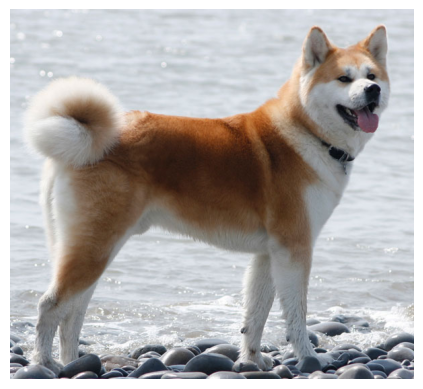

Result 1: dogs/akita_1.jpg with distance: 0.06


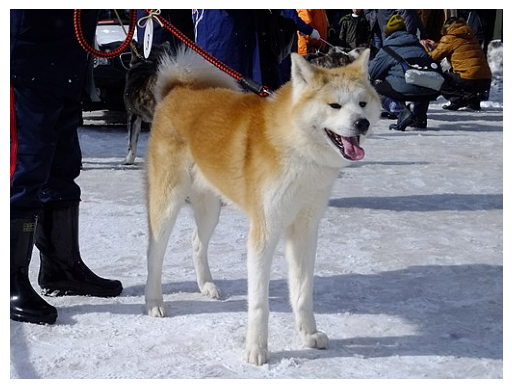

In [37]:
# %%
show_query_results(query_list, query_result)